## Imports

In [1]:
import folium
import json
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy.stats as st

from branca.colormap import linear
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

# <font color='blue'> Cleaning</font>

### Our Dataset is a csv file, imported as a panda DataFrame

In [2]:
dataset = pd.read_csv("religion-survey-results.csv", sep = ",")

### We drop the first colum wich was useless (column with all fields filled by 'response')

In [3]:
dataset = dataset.drop(index = 0)
dataset

,"What is your present religion, if any?",Unnamed: 1,Do you consider yourself to be an evangelical?,Do you attend religious services,"How often do you: Pray in public with visible motions (sign of the cross, bowing, prostration, shokeling, etc)","How often do you: Pray in public using some kind of physical object (rosary, tefillin, etc)",How often do you: Pray aloud before meals in the presence of people who don't belong to your religion,How often do you: Tell someone you'll pray for him or her,How often do you: Ask or offer to pray with someone,"How often do you: Bring up your religion, unprompted, in conversation",...,How comfortable would you be seeing someone who practices a different religion from you: Ask or offer to pray with you,"How comfortable would you be seeing someone who practices a different religion from you: Bring up his or her own religion, unprompted, in conversation","How comfortable would you be seeing someone who practices a different religion from you: Ask you about your religion, unprompted, in conversation","How comfortable would you be seeing someone who practices a different religion from you: Decline some kind of food or beverage for religious reasons (kosher, halal, fasting rules, etc)","How comfortable would you be seeing someone who practices a different religion from you: Wear religious clothing/jewelry (hijab, kippah, wig, kara, turban, cross, etc)","How comfortable would you be seeing someone who practices a different religion from you: Participate in a public religious event on the streets (Corpus Christi procession, inauguration of Torah scrolls, etc)",What is your age?,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
1,None of these,Wesleyan Christian,No,Weekly or more,A few times per week,Not applicable to my religious beliefs,A few times per month,A few times per week,Never,A few times per month,...,Extremely comfortable,Extremely comfortable,Extremely comfortable,Extremely comfortable,Extremely comfortable,Extremely comfortable,18 - 29,Male,"$0 to $9,999",East North Central
2,Atheist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Very comfortable,Somewhat comfortably,Very comfortable,Extremely comfortable,Extremely comfortable,Extremely comfortable,18 - 29,Male,"$10,000 to $24,999",Middle Atlantic
3,Protestant,NaN,No,Weekly or more,A few times per month,Never,Once a year or less,A few times per month,A few times per month,A few times per month,...,Extremely comfortable,Extremely comfortable,Extremely comfortable,Extremely comfortable,Extremely comfortable,Extremely comfortable,18 - 29,Male,"$25,000 to $49,999",East North Central
4,Muslim,NaN,No,Weekly or more,Every day,A few times per month,Never,Once a month or less,Once a month or less,Never,...,Very comfortable,Very comfortable,Very comfortable,Very comfortable,Very comfortable,Very comfortable,18 - 29,Male,"$0 to $9,999",South Atlantic
5,None of these,Working on Christianity. Orthodox seemed too c...,No,Weekly or more,Never,Never,Never,Once a month or less,A few times per month,Once a month or less,...,Not so comfortable,Not so comfortable,Not so comfortable,Not so comfortable,Very comfortable,Somewhat comfortably,18 - 29,Male,"$75,000 to $99,999",Pacific
6,None of these,Episcopalian,No,Less than weekly,Once a year or less,Never,Once a month or less,Once a month or less,Never,Never,...,Not so comfortable,Somewhat comfortably,Somewhat comfortably,Very comfortable,Very comfortable,Very comfortable,18 - 29,Male,"$25,000 to $49,999",Mountain
7,None of these,the multiverse,No,Never,Never,Never,Never,Never,Never,Never,...,Extremely comfortable,Extremely comfortable,Extremely comfortable,Extremely comfortable,Extremely comfortable,Extremely comfortable,18 - 29,Male,"$10,000 to $24,999",East North Central
8,Protestant,NaN,Yes,Less than weekly,Never,Not applicable to my religious beliefs,Never,Once a year or less,Once a year or less,Never,...,Extremely comfortable,Not at all comfortable,S

### Many people respond 'None of these' and precise Christian for their religion

### So we replace 'None of these' by Chrisitan for those persons and leave the other one at 'None of these'

In [4]:
is_christian = dataset[dataset.columns[1]].str.contains('Christian',case=False)

for i in range(1,len(is_christian)):
    if is_christian[i] == True : 
        dataset[dataset.columns[0]][i] = 'Non Denominational Christian'

### Then we delete the filed 'None of these' of the dataset which become useless

In [5]:
dataset = dataset.drop(labels=dataset.columns[1], axis=1)

## To analyse the data, strings are not usefull so we replace each answer by a number

In [6]:
dataToNb = {#Evangelical
            "Yes" : 1,
            "No" : 0,
            #Attend religious services
            "Never" : 0,
            "Less than weekly" : 1,
            "Weekly or more" : 2,
            # How often do you ? 
            "Not applicable to my religious beliefs" : -1,
            "Once a year or less" : 1,
            "Once a month or less" : 2,
            "A few times per month" : 3,
            "A few times per week" : 4,
            "Every day" : 5,
            # How comfortable do you feel when you ? 
            "I don't do this" : -1,
            "Not at all comfortable" : 0,
            "Not so comfortable" : 1,
            "Somewhat comfortably" : 2,
            "Very comfortable" : 3,
            "Extremely comfortable" : 4,
            # Gender
            "Male" : 0,
            "Female" : 1,
            # Age
            "18 - 29" : 1,
            "30 - 44" : 2,
            "45 - 59" : 3,
            "60+" : 4,
            # Revenue 
            '$0 to $9,999' : 0,
            '$10,000 to $24,999' : 1,
            '$25,000 to $49,999' : 2,
            '$50,000 to $74,999' : 3,
            '$75,000 to $99,999' : 4,
            '$100,000 to $124,999' : 5,
            '$125,000 to $149,999' : 6,
            '$150,000 to $174,999' : 7,
            '$175,000 to $199,999' : 8,
            '$200,000 and up' : 9,
            # Location
            'Prefer not to answer' : -1,
            'East North Central' : 5,
            'East South Central' : 6,
            'Middle Atlantic' : 7,
            'Mountain' : 2,
            'New England' : 9,
            'Pacific' : 1,
            'South Atlantic' : 8,
            'West North Central' : 3,
            'West South Central' : 4,
            np.float("nan"): -1
           }

In [7]:
dataset = dataset.replace(dataToNb)

In [8]:
dataset

,"What is your present religion, if any?",Do you consider yourself to be an evangelical?,Do you attend religious services,"How often do you: Pray in public with visible motions (sign of the cross, bowing, prostration, shokeling, etc)","How often do you: Pray in public using some kind of physical object (rosary, tefillin, etc)",How often do you: Pray aloud before meals in the presence of people who don't belong to your religion,How often do you: Tell someone you'll pray for him or her,How often do you: Ask or offer to pray with someone,"How often do you: Bring up your religion, unprompted, in conversation","How often do you: Ask others about their religion, unprompted, in conversation",...,How comfortable would you be seeing someone who practices a different religion from you: Ask or offer to pray with you,"How comfortable would you be seeing someone who practices a different religion from you: Bring up his or her own religion, unprompted, in conversation","How comfortable would you be seeing someone who practices a different religion from you: Ask you about your religion, unprompted, in conversation","How comfortable would you be seeing someone who practices a different religion from you: Decline some kind of food or beverage for religious reasons (kosher, halal, fasting rules, etc)","How comfortable would you be seeing someone who practices a different religion from you: Wear religious clothing/jewelry (hijab, kippah, wig, kara, turban, cross, etc)","How comfortable would you be seeing someone who practices a different religion from you: Participate in a public religious event on the streets (Corpus Christi procession, inauguration of Torah scrolls, etc)",What is your age?,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
1,Non Denominational Christian,0,2,4,-1,3,4,0,3,3,...,4,4,4,4,4,4,1,0,0,5
2,Atheist,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,3,2,3,4,4,4,1,0,1,7
3,Protestant,0,2,3,0,1,3,3,3,2,...,4,4,4,4,4,4,1,0,2,5
4,Muslim,0,2,5,3,0,2,2,0,1,...,3,3,3,3,3,3,1,0,0,8
5,Non Denominational Christian,0,2,0,0,0,2,3,2,1,...,1,1,1,1,3,2,1,0,4,1
6,None of these,0,1,1,0,2,2,0,0,0,...,1,2,2,3,3,3,1,0,2,2
7,None of these,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,1,0,1,5
8,Protestant,1,1,0,-1,0,1,1,0,0,...,4,0,2,4,2,4,1,0,0,5
9,None of these,0,0,0,0,0,0,0,5,0,...,2,1,1,2,3,3,1,0,1,8
10,Protestant,0,2,4,1,3,3,2,2,2,...,2,3,3,3,3,3,3,0,3,2


# <font color='blue'> Exploratory analysis</font>

# Religions histogram

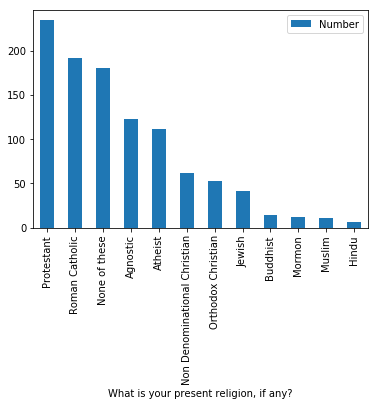

In [9]:
dataSeriesReligion = dataset.groupby(dataset.columns[0]).count()[dataset.columns[1]]
dataSeriesReligion.name = "Number"
dataFrameReligion = pd.DataFrame(dataSeriesReligion.sort_values(ascending=False))
dataFrameReligion.plot(kind='bar');

# Analysis

In [10]:
dataset[dataset >= 0].describe()

,Do you consider yourself to be an evangelical?,Do you attend religious services,"How often do you: Pray in public with visible motions (sign of the cross, bowing, prostration, shokeling, etc)","How often do you: Pray in public using some kind of physical object (rosary, tefillin, etc)",How often do you: Pray aloud before meals in the presence of people who don't belong to your religion,How often do you: Tell someone you'll pray for him or her,How often do you: Ask or offer to pray with someone,"How often do you: Bring up your religion, unprompted, in conversation","How often do you: Ask others about their religion, unprompted, in conversation","How often do you: Decline some kind of food or beverage for religious reasons (kosher, halal, fasting rules, etc)",...,How comfortable would you be seeing someone who practices a different religion from you: Ask or offer to pray with you,"How comfortable would you be seeing someone who practices a different religion from you: Bring up his or her own religion, unprompted, in conversation","How comfortable would you be seeing someone who practices a different religion from you: Ask you about your religion, unprompted, in conversation","How comfortable would you be seeing someone who practices a different religion from you: Decline some kind of food or beverage for religious reasons (kosher, halal, fasting rules, etc)","How comfortable would you be seeing someone who practices a different religion from you: Wear religious clothing/jewelry (hijab, kippah, wig, kara, turban, cross, etc)","How comfortable would you be seeing someone who practices a different religion from you: Participate in a public religious event on the streets (Corpus Christi procession, inauguration of Torah scrolls, etc)",What is your age?,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
count,920.000000,926.000000,789.000000,733.000000,841.000000,874.000000,863.000000,887.000000,892.000000,792.000000,...,1024.000000,1021.000000,1028.000000,1024.000000,1025.000000,1030.000000,1039.000000,1039.000000,906.000000,1026.000000
mean,0.171739,0.877970,1.626109,0.638472,1.514863,2.194508,1.414832,1.356257,0.885650,0.556818,...,2.151367,2.306562,2.405642,2.936523,2.822439,2.619417,2.567854,0.527430,3.432671,5.112086
std,0.377359,0.792676,1.907340,1.395345,1.795518,1.648677,1.640373,1.499971,1.287223,1.162761,...,1.357625,1.229158,1.283498,1.104896,1.138669,1.160079,1.086334,0.499487,2.420537,2.589304
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000,3.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,...,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,5.000000
75%,0.000000,2.000000,3.000000,0.000000,3.000000,4.000000,3.000000,2.000000,1.000000,1.000000,...,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,1.000000,5.000000,8.000000
max,1.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,9.000000,9.000000


In [11]:
columnsToNumbers = dict(zip(dataset.columns, range(len(dataset.columns))))
numbersToColumns = {y:x for x,y in columnsToNumbers.items()}

In [12]:
dataset_renamed = dataset.rename(columns=columnsToNumbers)

# Boxplot

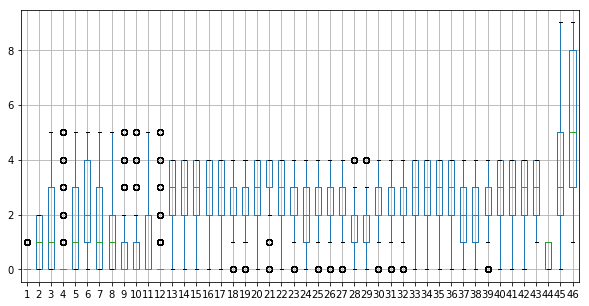

In [13]:
plt.figure(figsize=[10,5])
dataset[dataset >= 0].rename(columns=columnsToNumbers).boxplot()
plt.show()

In [14]:
correlations = dataset[dataset >= 0].rename(columns=columnsToNumbers).corr()

# Correlation matrix

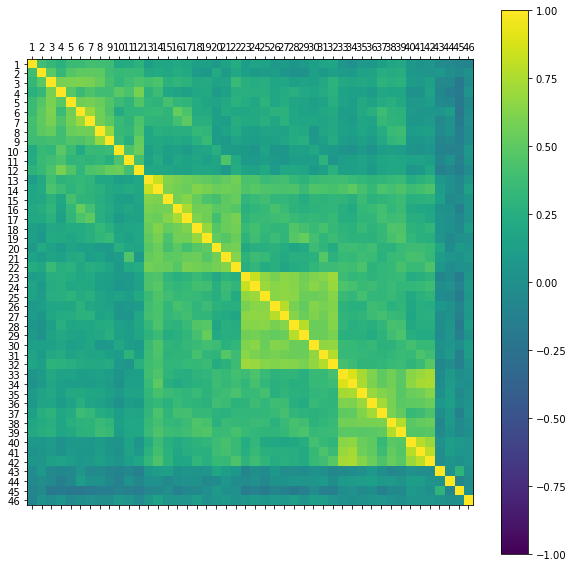

In [15]:
names = correlations.columns.tolist()
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, 46, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

# Questions with most correlated answers

In [16]:
maximum = [0,0,0]
ind_max = [[0,0],[0,0],[0,0]]
for i in correlations.columns:
    for j in correlations.index:
        if i < j :                 # We look only bellow the diagonal of the correlation matrix (which is symetric)
            if abs(correlations[i][j])>=min(maximum):
                ind_max[maximum.index(min(maximum))] = [i,j]
                maximum[maximum.index(min(maximum))] = abs(correlations[i][j])
print(maximum)
print(ind_max)

[0.8332061329319711, 0.89304080698974653, 0.83311619320376307]
[[23, 24], [33, 34], [13, 14]]


In [17]:
for i in range(len(ind_max)):
    print("Pair_" + str(i))
    print("-"+numbersToColumns[ind_max[i][0]])
    print("-"+numbersToColumns[ind_max[i][1]])
    print()

Pair_0
-How comfortable do you think someone outside your religion would be if they saw you: Pray in public with visible motions (sign of the cross, bowing, prostration, shokeling, etc)
-How comfortable do you think someone outside your religion would be if they saw you: Pray in public using some kind of physical object (rosary, tefillin, etc)

Pair_1
-How comfortable would you be seeing someone who practices a different religion from you: Pray in public with visible motions (sign of the cross, bowing, prostration, shokeling, etc)
-How comfortable would you be seeing someone who practices a different religion from you: Pray in public using some kind of physical object (rosary, tefillin, etc)

Pair_2
-How comfortable do you feel when you: Pray in public with visible motions (sign of the cross, bowing, prostration, shokeling, etc)
-How comfortable do you feel when you: Pray in public using some kind of physical object (rosary, tefillin, etc)



# Importance of each question

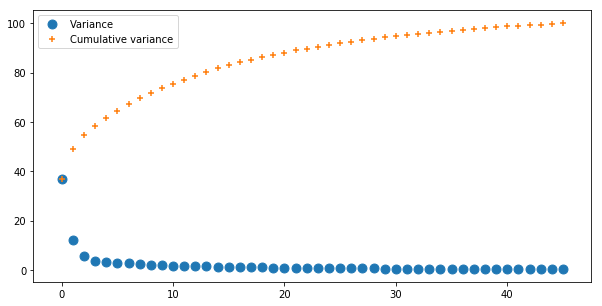

In [18]:
dataset_std = pd.DataFrame(StandardScaler().fit_transform(dataset.drop(labels=dataset.columns[0], axis=1)))
cov_std = dataset_std.corr()
eig_vals, eig_vect = np.linalg.eig(cov_std)
eig_pairs = [(np.abs(eig_vals[i]), eig_vect[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort()
eig_pairs.reverse()
sum_ev = sum(eig_vals)
pve = [(i / sum_ev)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_pve = np.cumsum(pve)

fig = plt.figure(figsize=[10,5])
plt.scatter([i for i in range(len(dataset_std.columns))], pve, s=80)
plt.scatter([i for i in range(len(dataset_std.columns))], cum_var_pve, marker='+')
plt.legend(['Variance', 'Cumulative variance'])
plt.show()

# Principal components analysis

In [19]:
dataset_pca = PCA(n_components=2).fit_transform(dataset_std)

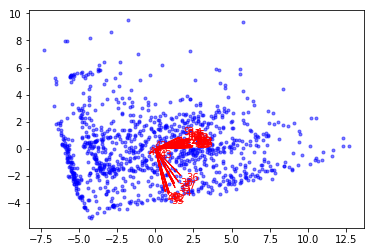

In [20]:
pca = PCA(n_components=2)

pca.fit_transform(dataset_std)
# 0,1 denote PC1 and PC2; change values for other PCs
xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[1]

xs = pca.transform(dataset_std)[:,0] # see 'prcomp(my_data)$x' in R
ys = pca.transform(dataset_std)[:,1]


## visualize projections
    
## Note: scale values for arrows and text are a bit inelegant as of now,
##       so feel free to play around with them

for i in range(len(xs)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.plot(xs[i], ys[i], 'b.', zorder=1, alpha = 0.5)
    #plt.text(xs[i]*1.2, ys[i]*1.2, list(dataset.index)[i], color='b')

for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025, zorder=2)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(dataset.rename(columns=columnsToNumbers).columns.values)[i], color='r')



plt.show()

In [21]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dataset_std)
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['principal component 1', 'principal component 2'])
principalDf.index = pd.Index(range(1,dataset.shape[0] + 1))
finalDf = pd.concat([principalDf, dataset], axis = 1)

# Maps

In [22]:
# Open the map of the regions
us_states = os.path.join('','us-states-project.json')

geo_json_data = json.load(open(us_states))
kw = {'location': [38, -100], 'zoom_start': 4}

In [23]:
def showMap(question):
    # Show the distribution of answers to a question on a map according to the regions
    dataS = dataset[dataset>=0].groupby("US Region").mean()[question]
    datadict = dataS.to_dict()
    
    colormap = linear.Greens_03.scale(
        dataS.min(),
        dataS.max())
    
    m = folium.Map(**kw)

    folium.GeoJson(open(us_states).read(),
           style_function=lambda feature: {
            'fillColor': colormap(datadict[feature['properties']['id']]),
            'color': 'black',
            'weight': 1,
            'dashArray': '2, 2'
        }).add_to(m)
    print(question)
    return m, colormap

In [24]:
def showReligionMap(religion):
    # Show the distribution of one religion on the map according to
    # the regions
    emptyDataS = pd.Series([0]*9)
    emptyDataS.index = pd.Index(range(1,10))
    dataRel = dataset[dataset["What is your present religion, if any?"] == religion]
    dataS = dataRel[dataRel >= 0].groupby("US Region").count()[dataRel.columns[0]] / dataset.groupby('US Region').size()
    dataS = (dataS + emptyDataS).fillna(0)
    datadict = dataS.to_dict()
    
    colormap = linear.Greens_03.scale(
        dataS.min(),
        dataS.max())
    
    m = folium.Map(**kw)

    folium.GeoJson(open(us_states).read(),
           style_function=lambda feature: {
            'fillColor': colormap(datadict[feature['properties']['id']]),
            'color': 'black',
            'weight': 1,
            'dashArray': '2, 2'
        }).add_to(m)
    print(religion)
    return m, colormap

# The 5 questions with greatest standard deviation in the whole survey

In [25]:
dataset_std = dataset_renamed[dataset_renamed >= 0].std()

In [26]:
stdList = [0,0,0,0,0]
stdListInd = [0,0,0,0,0]

# remove irrelevant questions
data = dataset_std.drop(index=[1,2,43,44,45,46])

for i in data.index:
    if data[i] > min(stdList) :
        stdListInd[stdList.index(min(stdList))] = i
        stdList[stdList.index(min(stdList))] = data[i]
print(stdListInd)
print(stdList)

[3, 11, 5, 6, 7]
[1.907340267685242, 1.7570871093956311, 1.7955182993838421, 1.6486773616724093, 1.6403730797128278]


In [27]:
stdListTotal = list(zip(stdList, stdListInd))
stdListTotal.sort()
stdListTotal.reverse()

for _,ind in stdListTotal:
    print(ind,":", dataset.columns[ind])

3 : How often do you: Pray in public with visible motions (sign of the cross, bowing, prostration, shokeling, etc)
5 : How often do you: Pray aloud before meals in the presence of people who don't belong to your religion
11 : How often do you: Wear religious clothing/jewelry (hijab, kippah, wig, kara, turban, cross, etc)
6 : How often do you: Tell someone you'll pray for him or her
7 : How often do you: Ask or offer to pray with someone


# Q3 analysis

In [28]:
dataset_mean = dataset[dataset >= 0].groupby(dataset.columns[0]).mean()

In [29]:
Q3 = dataset_mean[dataset.columns[3]]
pd.DataFrame(Q3)

,"How often do you: Pray in public with visible motions (sign of the cross, bowing, prostration, shokeling, etc)"
"What is your present religion, if any?",
Agnostic,0.200000
Atheist,NaN
Buddhist,0.125000
Hindu,2.400000
Jewish,0.392857
Mormon,2.666667
Muslim,3.818182
Non Denominational Christian,1.859649
None of these,1.244604


In [30]:
totalAv = dataset[dataset >= 0].mean()[2] #Mean with all the religions

In [31]:
pd.DataFrame(Q3 - totalAv)

,"How often do you: Pray in public with visible motions (sign of the cross, bowing, prostration, shokeling, etc)"
"What is your present religion, if any?",
Agnostic,-1.426109
Atheist,NaN
Buddhist,-1.501109
Hindu,0.773891
Jewish,-1.233252
Mormon,1.040558
Muslim,2.192073
Non Denominational Christian,0.233540
None of these,-0.381505


# Age
18 - 29: 1<br\>
30 - 44: 2<br\>
45 - 59: 3<br\>
60+: 4

In [32]:
m,colormap = showMap(numbersToColumns[43])
m

What is your age?


In [33]:
colormap

In [34]:
dMeanAge = dataset[dataset>=0].groupby(numbersToColumns[43]).mean()

In [35]:
for column in dMeanAge.columns:
    print(dMeanAge[column])

What is your age?
1    0.184211
2    0.172269
3    0.192308
4    0.137931
Name: Do you consider yourself to be an evangelical?, dtype: float64
What is your age?
1    0.784211
2    0.816667
3    0.992366
4    0.888889
Name: Do you attend religious services, dtype: float64
What is your age?
1    1.680982
2    1.761194
3    1.696035
4    1.363636
Name: How often do you: Pray in public with visible motions (sign of the cross, bowing, prostration, shokeling, etc), dtype: float64
What is your age?
1    0.638158
2    0.803279
3    0.705607
4    0.396739
Name: How often do you: Pray in public using some kind of physical object (rosary, tefillin, etc), dtype: float64
What is your age?
1    1.511765
2    1.655814
3    1.627615
4    1.253456
Name: How often do you: Pray aloud before meals in the presence of people who don't belong to your religion, dtype: float64
What is your age?
1    1.982558
2    2.156951
3    2.380392
4    2.183036
Name: How often do you: Tell someone you'll pray for him or h

# Gender
Male: 0<br\>
Female: 1

In [36]:
m,colormap = showMap(numbersToColumns[44])
m

What is your gender?


In [37]:
colormap

In [38]:
dMeanGender = dataset[dataset>=0].groupby(numbersToColumns[44]).mean()

In [39]:
for column in dMeanGender.columns:
    print(dMeanGender[column])

What is your gender?
0    0.195704
1    0.151697
Name: Do you consider yourself to be an evangelical?, dtype: float64
What is your gender?
0    0.890736
1    0.867327
Name: Do you attend religious services, dtype: float64
What is your gender?
0    1.731844
1    1.538283
Name: How often do you: Pray in public with visible motions (sign of the cross, bowing, prostration, shokeling, etc), dtype: float64
What is your gender?
0    0.842262
1    0.465995
Name: How often do you: Pray in public using some kind of physical object (rosary, tefillin, etc), dtype: float64
What is your gender?
0    1.643617
1    1.410753
Name: How often do you: Pray aloud before meals in the presence of people who don't belong to your religion, dtype: float64
What is your gender?
0    1.977099
1    2.372141
Name: How often do you: Tell someone you'll pray for him or her, dtype: float64
What is your gender?
0    1.374046
1    1.448936
Name: How often do you: Ask or offer to pray with someone, dtype: float64
What is 

# Income
\$0 to \$9,999: 0<br\>
\$10,000 to \$24,999: 1<br\>
\$25,000 to \$49,999: 2<br\>
\$50,000 to \$74,999: 3<br\>
\$75,000 to \$99,999: 4<br\>
\$100,000 to \$124,999: 5<br\>
\$125,000 to \$149,999: 6<br\>
\$150,000 to \$174,999: 7<br\>
\$175,000 to \$199,999: 8<br\>
\$200,000 and up: 9

In [40]:
m,colormap = showMap(numbersToColumns[45])
m


How much total combined money did all members of your HOUSEHOLD earn last year?


In [41]:
colormap

In [42]:
dMeanIncome = dataset[dataset>=0].groupby(numbersToColumns[45]).mean()

In [43]:
for column in dMeanIncome.columns:
    print(dMeanIncome[column])

How much total combined money did all members of your HOUSEHOLD earn last year?
0.0    0.264368
1.0    0.217391
2.0    0.156250
3.0    0.187500
4.0    0.174757
5.0    0.150685
6.0    0.173077
7.0    0.166667
8.0    0.000000
9.0    0.093023
Name: Do you consider yourself to be an evangelical?, dtype: float64
How much total combined money did all members of your HOUSEHOLD earn last year?
0.0    0.922222
1.0    0.913978
2.0    0.838509
3.0    0.958621
4.0    0.825243
5.0    0.932432
6.0    0.961538
7.0    0.833333
8.0    0.636364
9.0    0.651163
Name: Do you attend religious services, dtype: float64
How much total combined money did all members of your HOUSEHOLD earn last year?
0.0    2.415584
1.0    2.025316
2.0    1.782609
3.0    1.689076
4.0    1.465116
5.0    1.459016
6.0    1.200000
7.0    1.031250
8.0    1.100000
9.0    1.073171
Name: How often do you: Pray in public with visible motions (sign of the cross, bowing, prostration, shokeling, etc), dtype: float64
How much total combined

Name: How comfortable do you think someone outside your religion would be if they saw you: Pray aloud before meals in the presence of people who don't belong to your religion, dtype: float64
How much total combined money did all members of your HOUSEHOLD earn last year?
0.0    2.531250
1.0    2.400000
2.0    2.349057
3.0    2.350000
4.0    2.318182
5.0    2.309091
6.0    2.210526
7.0    2.200000
8.0    1.857143
9.0    2.200000
Name: How comfortable do you think someone outside your religion would be if they saw you: Tell someone you'll pray for him or her, dtype: float64
How much total combined money did all members of your HOUSEHOLD earn last year?
0.0    2.433333
1.0    2.317460
2.0    2.291667
3.0    2.149425
4.0    2.290323
5.0    2.020408
6.0    1.945946
7.0    1.850000
8.0    1.750000
9.0    2.111111
Name: How comfortable do you think someone outside your religion would be if they saw you: Ask or offer to pray with someone, dtype: float64
How much total combined money did all mem

# Religion Maps

In [44]:
m,colormap = showReligionMap("Protestant")
m

Protestant


In [45]:
colormap

In [46]:
m,colormap = showReligionMap("Roman Catholic")
m

Roman Catholic


In [47]:
colormap

In [48]:
m,colormap = showReligionMap("None of these")
m

None of these


In [49]:
colormap

# <font color='blue'>Unsupervised learning</font>

In [50]:
def silhouette(dataset):
    for k in range(2, 20):
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(dataset) + (k + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=k, random_state=10)
        cluster_labels = clusterer.fit_predict(dataset)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(dataset, cluster_labels)
        print("For n_clusters =", k,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(dataset, cluster_labels)

        y_lower = 10
        for i in range(k):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.spectral(float(i) / k)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.spectral(cluster_labels.astype(float) / k)
        ax2.scatter(dataset["principal component 1"], dataset["principal component 2"], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % k),
                     fontsize=14, fontweight='bold')

        plt.show()

For n_clusters = 2 The average silhouette_score is : 0.286706819203


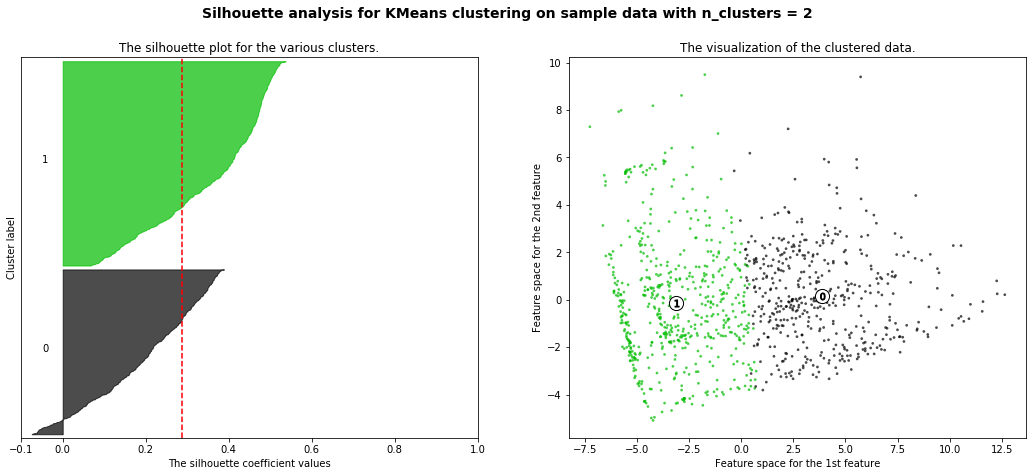

For n_clusters = 3 The average silhouette_score is : 0.196912724053


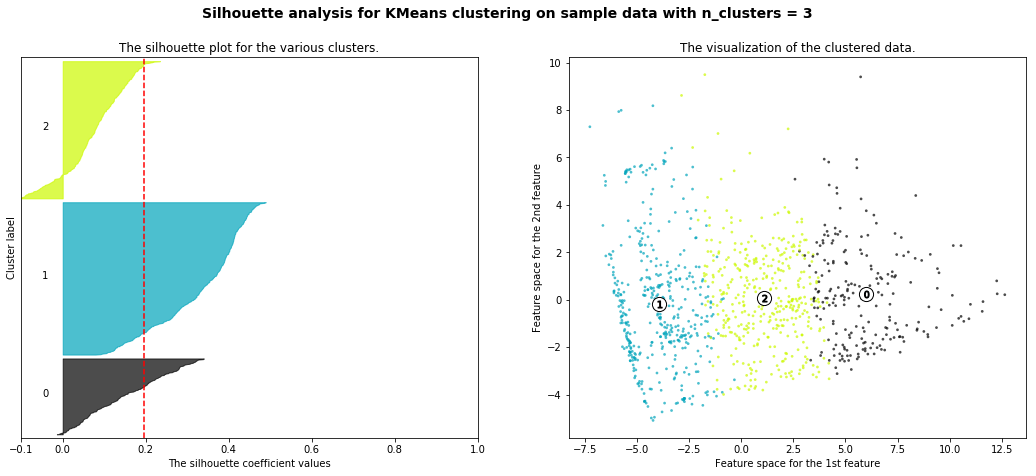

For n_clusters = 4 The average silhouette_score is : 0.146643723516


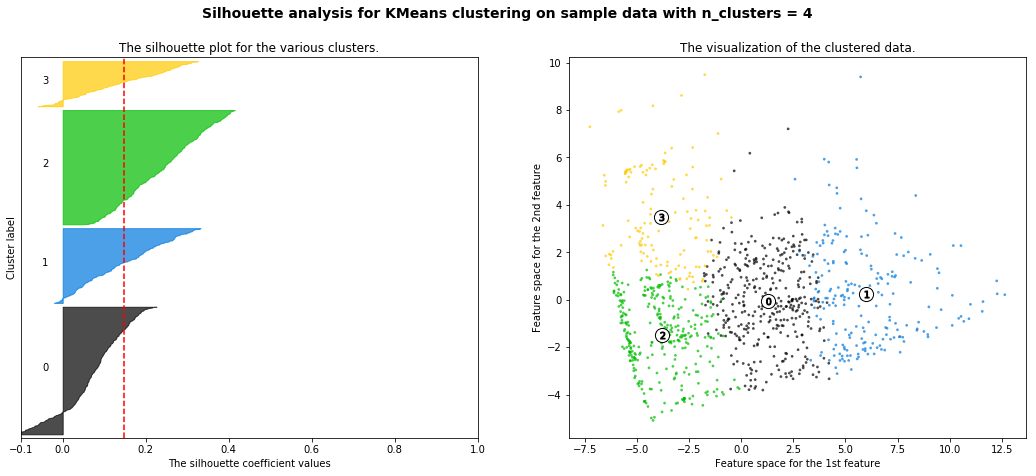

For n_clusters = 5 The average silhouette_score is : 0.131823136504


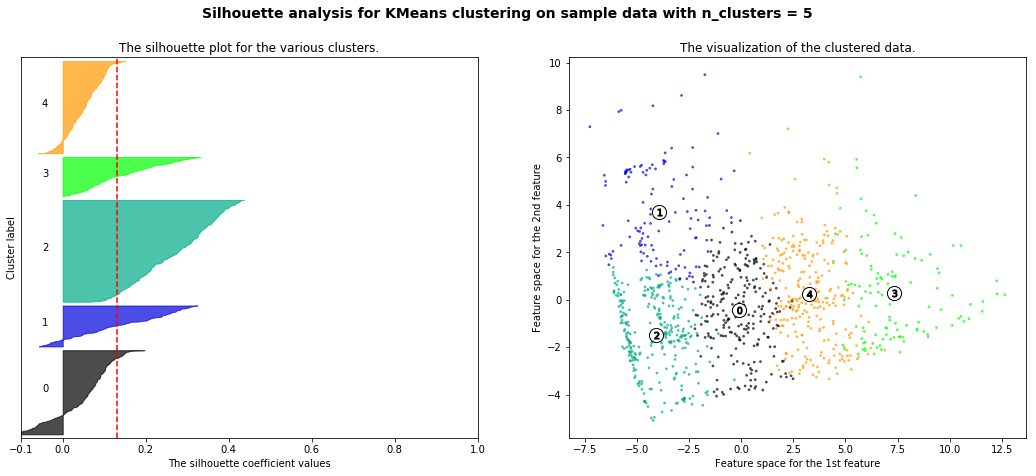

For n_clusters = 6 The average silhouette_score is : 0.134645694175


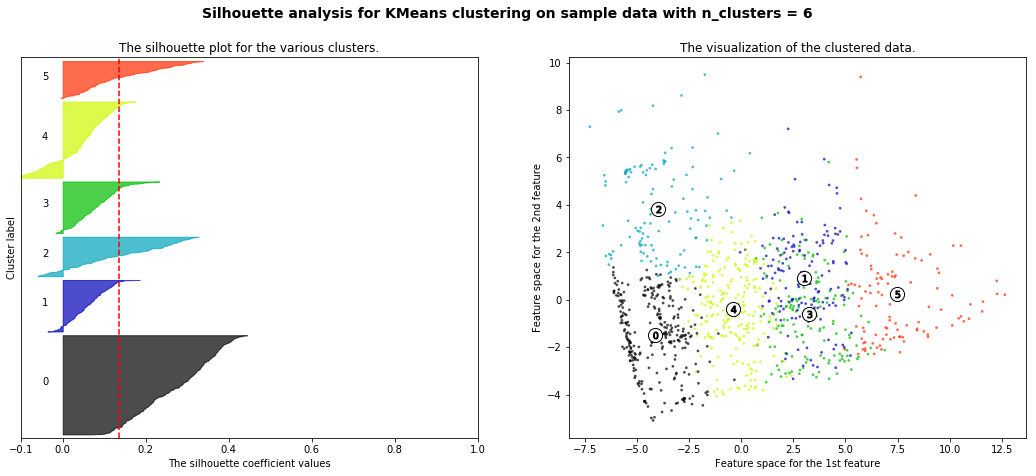

For n_clusters = 7 The average silhouette_score is : 0.0895307866651


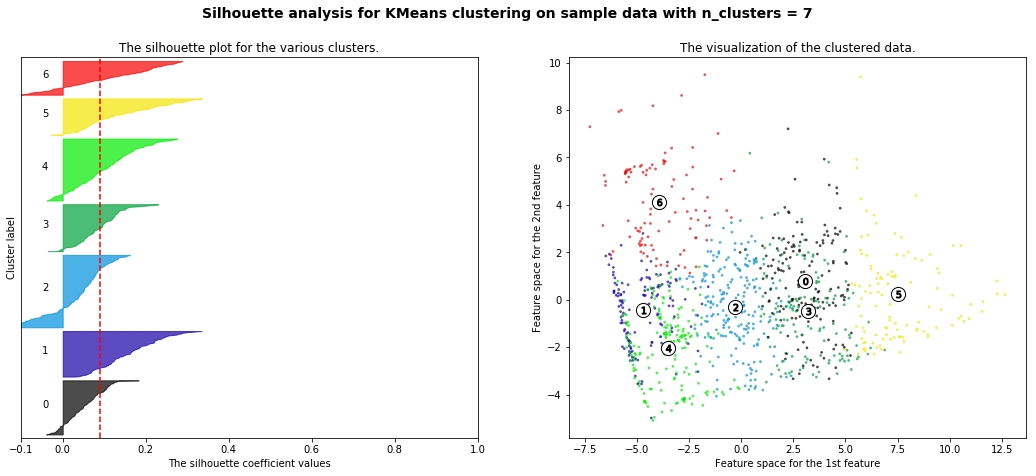

For n_clusters = 8 The average silhouette_score is : 0.0882580387607


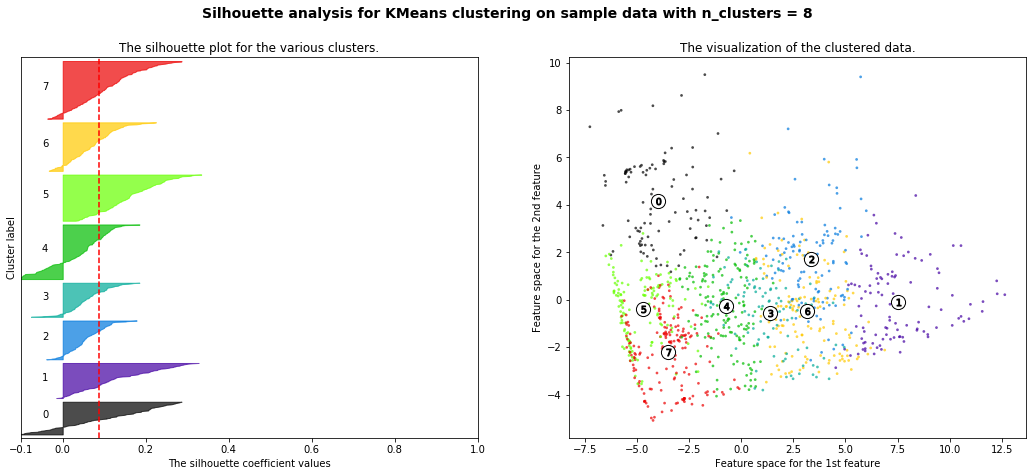

For n_clusters = 9 The average silhouette_score is : 0.0850522339317


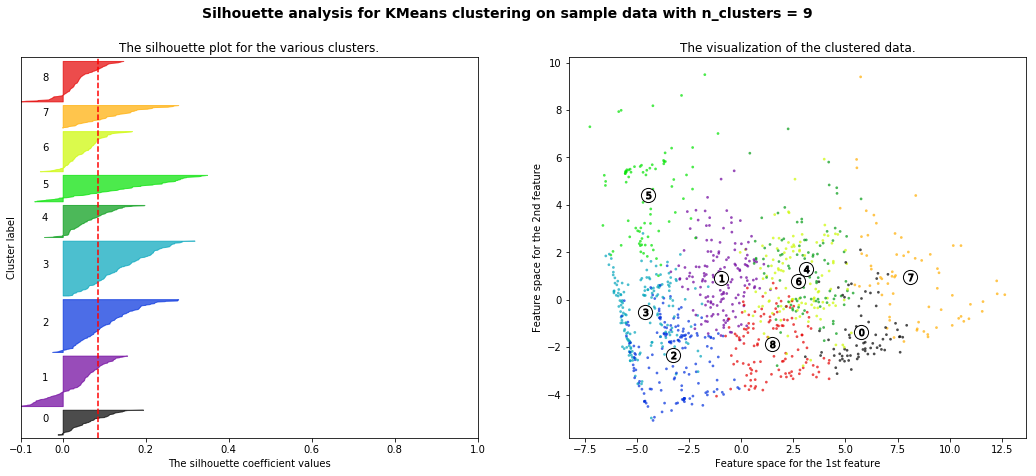

For n_clusters = 10 The average silhouette_score is : 0.0901371044591


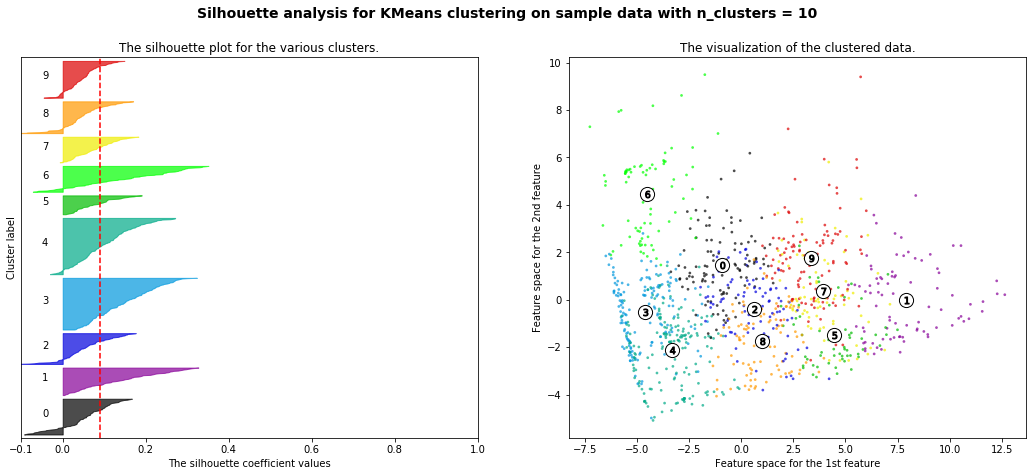

For n_clusters = 11 The average silhouette_score is : 0.0848863719478


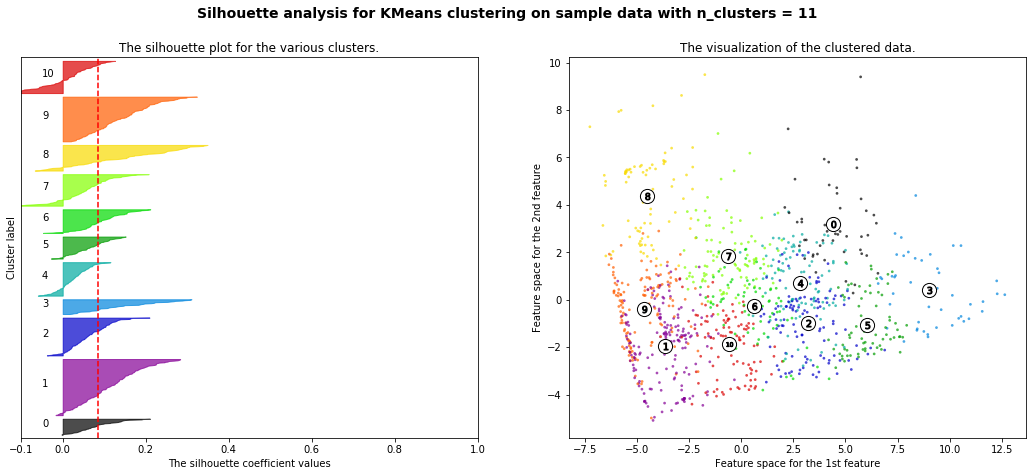

For n_clusters = 12 The average silhouette_score is : 0.0843946084696


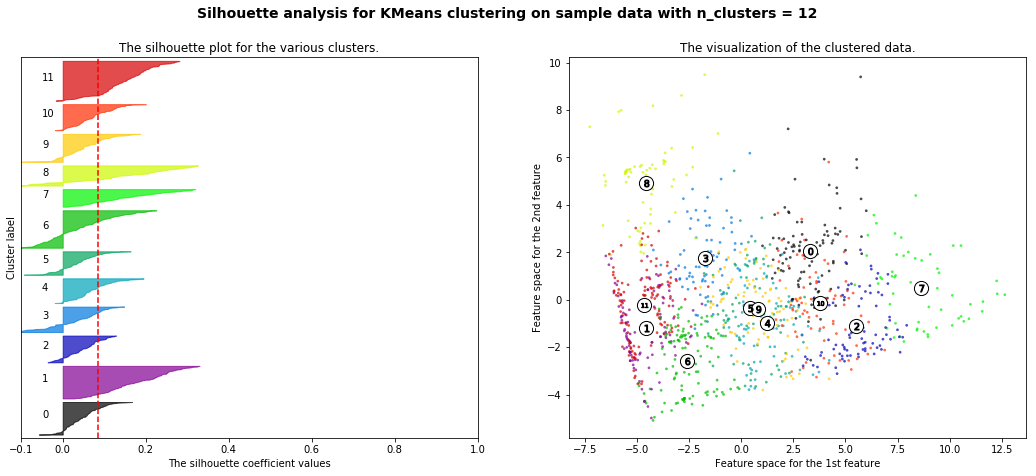

For n_clusters = 13 The average silhouette_score is : 0.0778065385132


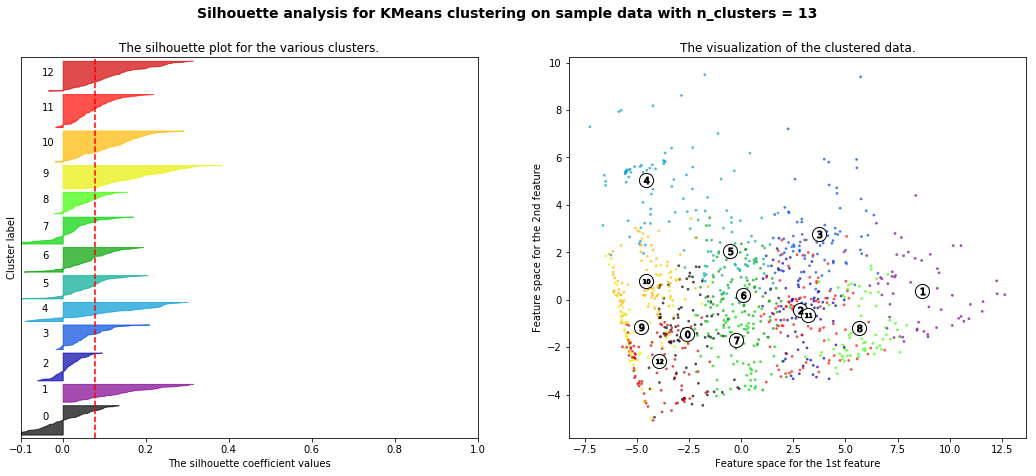

For n_clusters = 14 The average silhouette_score is : 0.0855398148494


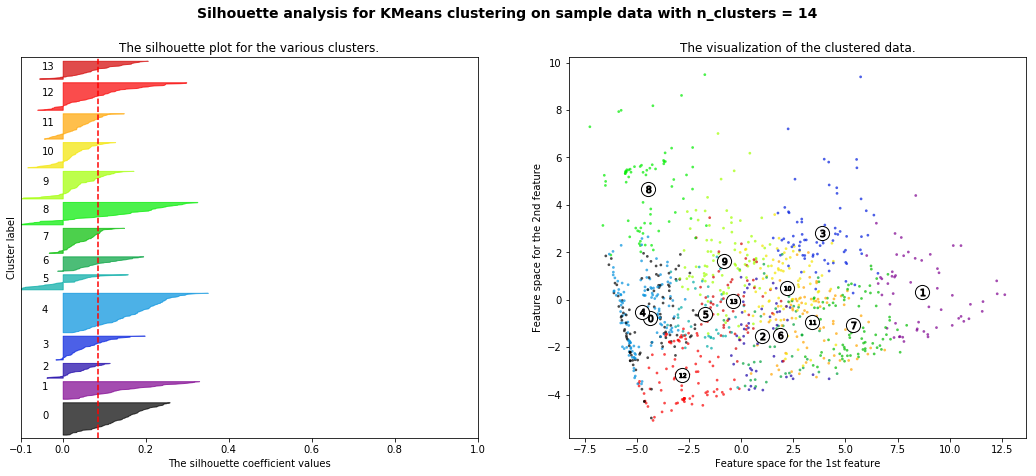

For n_clusters = 15 The average silhouette_score is : 0.0781834870211


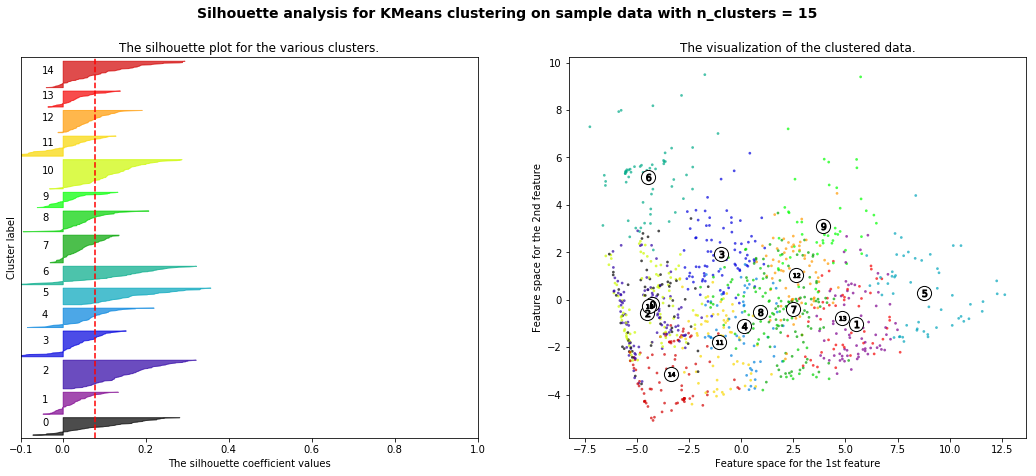

For n_clusters = 16 The average silhouette_score is : 0.0788715978818


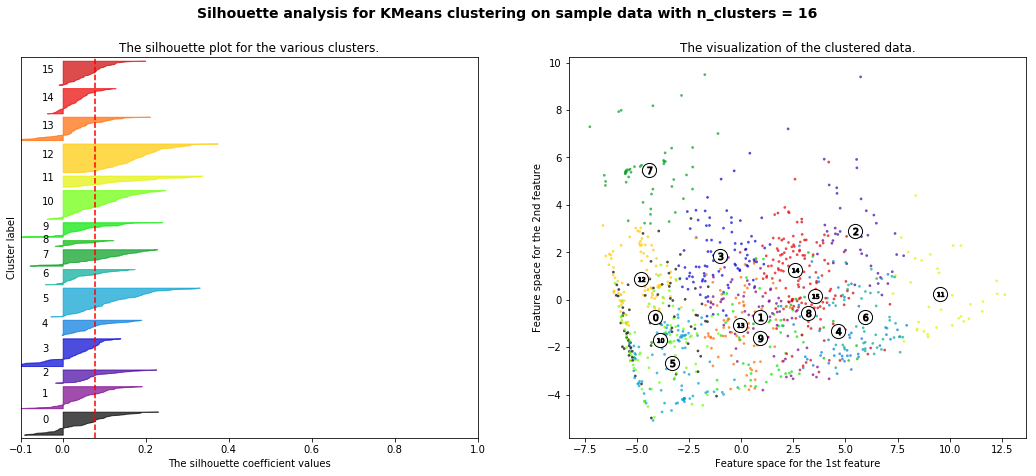

For n_clusters = 17 The average silhouette_score is : 0.0782188884243


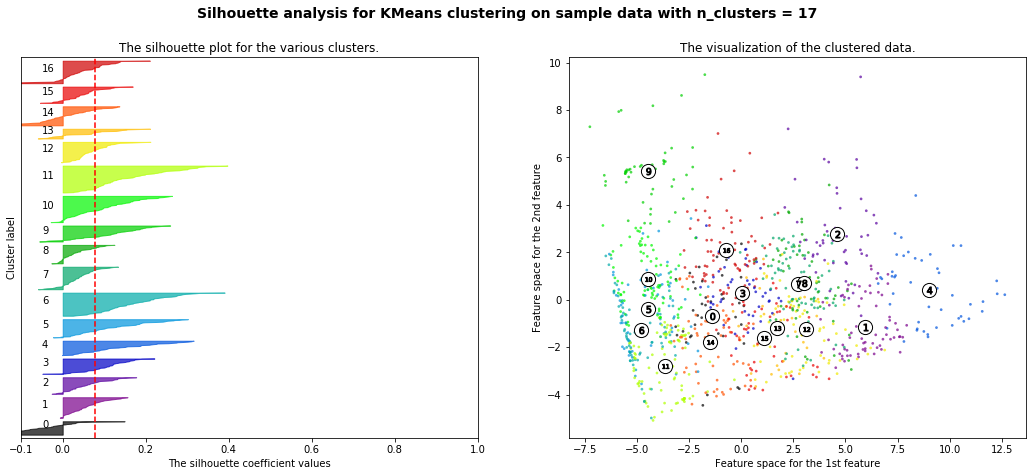

For n_clusters = 18 The average silhouette_score is : 0.0737941065334


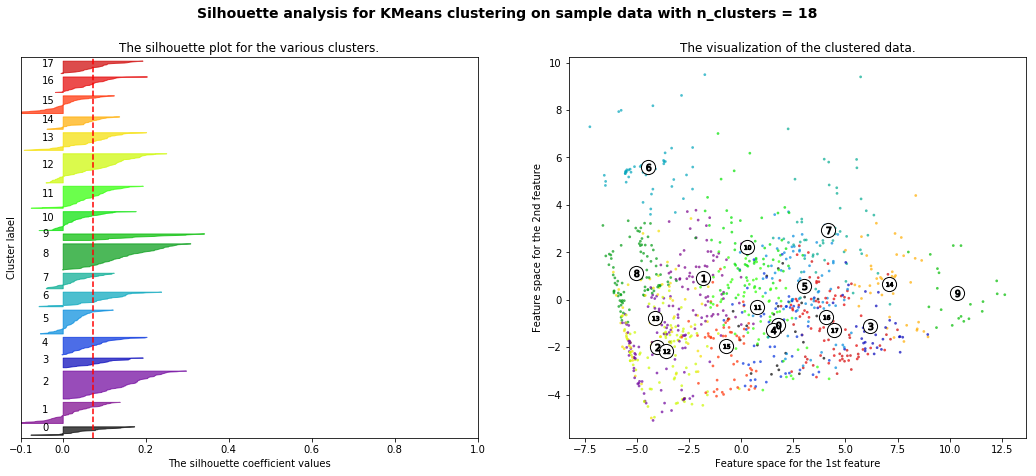

For n_clusters = 19 The average silhouette_score is : 0.0831464769685


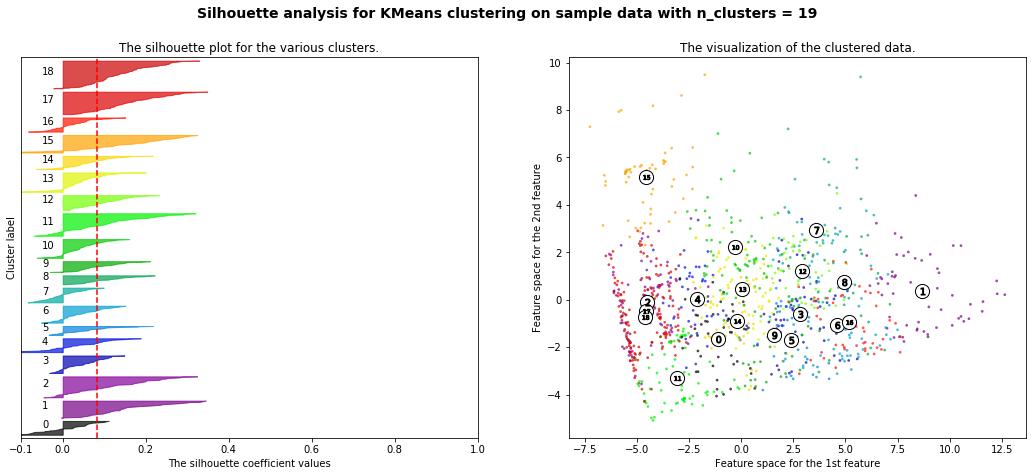

In [51]:
silhouette(finalDf.drop(labels="What is your present religion, if any?", axis=1))

# <font color='blue'>Supervised learning: Neural Network</font>

In [52]:
import glob
import os
import numpy as np
import keras
from keras.layers import Input, Activation, Dense, BatchNormalization,Dropout
from keras.models import Model, Sequential
from keras.callbacks import ModelCheckpoint,Callback
import keras.backend as K
from keras.optimizers import SGD

Using TensorFlow backend.


# Creating the architecture 

In [53]:
model = Sequential()
model.add(Dense(units=138, activation='sigmoid', input_dim=46))
model.add(Dropout(0.1))
model.add(Dense(units=12, activation='softmax'))

#sgd = SGD(lr=0.01, momentum=0.9, decay=0, nesterov=True)
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 138)               6486      
_________________________________________________________________
dropout_1 (Dropout)          (None, 138)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 12)                1668      
Total params: 8,154
Trainable params: 8,154
Non-trainable params: 0
_________________________________________________________________


### The dropout layer is just here to prevent over fitting by disabling randomly some neurons during the training

Else the architecture is Layer of 46 neurons --> 138 neurons --> 12 neurons  

# Preparing the dataset for the NeuralNetwork


In [54]:
def religionToVector(religion):
    religions = ["Agnostic", "Atheist", "Buddhist",
                 "Hindu", "Jewish", "Mormon", "Muslim", 
                 "Non Denominational Christian", "None of these","Orthodox Christian",
                 "Protestant", "Roman Catholic"]
    vector = [0] * len(religions)
    vector[religions.index(religion)] = 1
    return vector

In [55]:
def vectorToReligion(vector):
    religions = ["Agnostic", "Atheist", "Buddhist",
                 "Hindu", "Jewish", "Mormon", "Muslim", 
                 "Non Denominational Christian", "None of these","Orthodox Christian",
                 "Protestant", "Roman Catholic"]
    religion = religions[np.where(vector==1)[0][0]]
    return religion

# Normalization 

In [56]:
y_train_str = np.array(dataset[dataset.columns[0]])
y_train = np.array(list(map(religionToVector, y_train_str)))


x_train_nonorm = np.array(dataset.drop(labels=dataset.columns[0], axis=1))
x_train = [0]*len(x_train_nonorm)

for i in range(len(x_train_nonorm)):
    x_train[i] = x_train_nonorm[i]/float(max(x_train_nonorm[i]))
     
x_train = np.array(x_train)

# Training

The earlystop callback enables us to stop the training if the loss is small enough.

In [57]:
earlystop = keras.callbacks.EarlyStopping(monitor='loss', min_delta=1e-5, patience=5, verbose=1, mode='auto')
model.fit(x_train, y_train, epochs=250, batch_size=1, callbacks = [earlystop])

Epoch 1/250
1039/1039 [==============================] - 1s 1ms/step - loss: 1.9712 - acc: 0.3282
Epoch 2/250
1039/1039 [==============================] - 1s 988us/step - loss: 1.7436 - acc: 0.4023
Epoch 3/250
1039/1039 [==============================] - 1s 956us/step - loss: 1.6469 - acc: 0.4418
Epoch 4/250
1039/1039 [==============================] - 1s 1ms/step - loss: 1.5931 - acc: 0.4601
Epoch 5/250
1039/1039 [==============================] - 1s 1ms/step - loss: 1.5417 - acc: 0.4735
Epoch 6/250
1039/1039 [==============================] - 1s 1ms/step - loss: 1.4922 - acc: 0.4899
Epoch 7/250
1039/1039 [==============================] - 1s 1ms/step - loss: 1.4597 - acc: 0.4937
Epoch 8/250
1039/1039 [==============================] - 1s 1ms/step - loss: 1.4522 - acc: 0.4841
Epoch 9/250
1039/1039 [==============================] - 1s 1ms/step - loss: 1.4283 - acc: 0.5014
Epoch 10/250
1039/1039 [==============================] - 1s 1ms/step - loss: 1.4077 - acc: 0.5063
Epoch 11/250
10

1039/1039 [==============================] - 1s 1ms/step - loss: 0.8461 - acc: 0.6766
Epoch 84/250
1039/1039 [==============================] - 1s 909us/step - loss: 0.8371 - acc: 0.6814
Epoch 85/250
1039/1039 [==============================] - 1s 1ms/step - loss: 0.8377 - acc: 0.6785
Epoch 86/250
1039/1039 [==============================] - 1s 997us/step - loss: 0.8459 - acc: 0.6814
Epoch 87/250
1039/1039 [==============================] - 1s 932us/step - loss: 0.8320 - acc: 0.6833
Epoch 88/250
1039/1039 [==============================] - 1s 1ms/step - loss: 0.8236 - acc: 0.7007
Epoch 89/250
1039/1039 [==============================] - 1s 951us/step - loss: 0.8173 - acc: 0.6843
Epoch 90/250
1039/1039 [==============================] - 1s 1ms/step - loss: 0.8070 - acc: 0.7007
Epoch 91/250
1039/1039 [==============================] - 1s 1ms/step - loss: 0.8127 - acc: 0.6833
Epoch 92/250
1039/1039 [==============================] - 1s 1ms/step - loss: 0.7878 - acc: 0.7132
Epoch 93/250
10

In [58]:
loss_and_metrics = model.evaluate(x_train, y_train, batch_size=1)
print(loss_and_metrics)

1039/1039 [==============================] - 1s 602us/step
[0.39868859848208632, 0.86525505293551497]


In [59]:
count_t = 0
count_f = 0

for line in range(1,1039):
    print(dataset.iloc[[line], 0].values)
    classes = model.predict(np.array(dataset.iloc[[line]].drop(labels=dataset.columns[0], axis=1)))
    dataset.iloc[[line],0]
    vector = np.zeros(12)
    vector[np.where(classes == max(max(classes)))[1][0]] = 1
    print(vectorToReligion(vector))
    if vectorToReligion(vector) == dataset.iloc[[line],0].values:
        print('True')
        count_t += 1  
    else :
        print('False')
        count_f += 1
    print()

['Atheist']
Atheist
True

['Protestant']
Protestant
True

['Muslim']
Muslim
True

['Non Denominational Christian']
Non Denominational Christian
True

['None of these']
None of these
True

['None of these']
Roman Catholic
False

['Protestant']
Protestant
True

['None of these']
Agnostic
False

['Protestant']
Protestant
True

['Non Denominational Christian']
Non Denominational Christian
True

['Roman Catholic']
Roman Catholic
True

['Agnostic']
Agnostic
True

['None of these']
None of these
True

['Protestant']
Protestant
True

['Non Denominational Christian']
Non Denominational Christian
True

['Protestant']
Protestant
True

['Roman Catholic']
Roman Catholic
True

['Roman Catholic']
Roman Catholic
True

['Protestant']
Protestant
True

['None of these']
None of these
True

['Protestant']
Protestant
True

['None of these']
None of these
True

['None of these']
None of these
True

['Protestant']
Protestant
True

['Roman Catholic']
Roman Catholic
True

['Protestant']
Protestant
True

['Prot

Atheist
True

['None of these']
Agnostic
False

['None of these']
None of these
True

['Protestant']
Protestant
True

['Agnostic']
Agnostic
True

['Protestant']
Protestant
True

['Protestant']
Protestant
True

['Roman Catholic']
Roman Catholic
True

['Agnostic']
Agnostic
True

['Protestant']
Protestant
True

['Protestant']
Protestant
True

['Agnostic']
Agnostic
True

['Agnostic']
Agnostic
True

['Jewish']
Jewish
True

['Jewish']
Roman Catholic
False

['Protestant']
Protestant
True

['Agnostic']
None of these
False

['None of these']
Agnostic
False

['Atheist']
Atheist
True

['Roman Catholic']
Roman Catholic
True

['Protestant']
Protestant
True

['Protestant']
Agnostic
False

['Jewish']
Jewish
True

['Agnostic']
Agnostic
True

['None of these']
None of these
True

['Agnostic']
Agnostic
True

['Roman Catholic']
Roman Catholic
True

['Agnostic']
Agnostic
True

['None of these']
Buddhist
False

['Orthodox Christian']
Agnostic
False

['Atheist']
Atheist
True

['Non Denominational Christian'

Protestant
True

['Non Denominational Christian']
Protestant
False

['Muslim']
Muslim
True

['Protestant']
Protestant
True

['Atheist']
Atheist
True

['Buddhist']
Buddhist
True

['Roman Catholic']
Roman Catholic
True

['Atheist']
Atheist
True

['Atheist']
Atheist
True

['None of these']
None of these
True

['Atheist']
Atheist
True

['Buddhist']
Buddhist
True

['Protestant']
Protestant
True

['Atheist']
Atheist
True

['Orthodox Christian']
Orthodox Christian
True

['None of these']
None of these
True

['None of these']
None of these
True

['None of these']
Protestant
False

['Muslim']
Muslim
True

['Non Denominational Christian']
Non Denominational Christian
True

['None of these']
None of these
True

['None of these']
Protestant
False

['Mormon']
None of these
False

['Atheist']
Atheist
True

['Orthodox Christian']
Orthodox Christian
True

['Jewish']
Jewish
True

['Atheist']
Atheist
True

['Buddhist']
Buddhist
True

['Agnostic']
Agnostic
True

['Agnostic']
Agnostic
True

['Buddhist']
B

Non Denominational Christian
True

['Roman Catholic']
Roman Catholic
True

['Buddhist']
Buddhist
True

['Atheist']
Atheist
True

['None of these']
None of these
True

['Roman Catholic']
None of these
False

['Roman Catholic']
Roman Catholic
True

['None of these']
Agnostic
False

['Roman Catholic']
Roman Catholic
True

['Roman Catholic']
Roman Catholic
True

['None of these']
Protestant
False

['None of these']
None of these
True

['Roman Catholic']
Roman Catholic
True

['Roman Catholic']
Roman Catholic
True

['Protestant']
Protestant
True

['Atheist']
Atheist
True

['None of these']
None of these
True

['Protestant']
Protestant
True

['Roman Catholic']
Protestant
False

['Roman Catholic']
Roman Catholic
True

['Agnostic']
Agnostic
True

['Protestant']
Protestant
True

['Roman Catholic']
Roman Catholic
True

['Non Denominational Christian']
Non Denominational Christian
True

['None of these']
Protestant
False

['Atheist']
Atheist
True

['Jewish']
Jewish
True

['None of these']
Agnostic

Roman Catholic
True

['Roman Catholic']
Roman Catholic
True

['Muslim']
Muslim
True

['Agnostic']
Agnostic
True

['Protestant']
Protestant
True

['Protestant']
Protestant
True

['Protestant']
Protestant
True

['Protestant']
Protestant
True

['None of these']
Agnostic
False

['Jewish']
Jewish
True

['Non Denominational Christian']
Non Denominational Christian
True

['Protestant']
Protestant
True

['Protestant']
Protestant
True

['Protestant']
Protestant
True

['Protestant']
Protestant
True

['Atheist']
Atheist
True

['Atheist']
Atheist
True

['Atheist']
Atheist
True

['Atheist']
Atheist
True

['Protestant']
Protestant
True

['Non Denominational Christian']
Non Denominational Christian
True

['Roman Catholic']
Roman Catholic
True

['Orthodox Christian']
Protestant
False

['Muslim']
Muslim
True

['None of these']
Agnostic
False

['Roman Catholic']
Agnostic
False

['None of these']
Protestant
False

['Protestant']
Agnostic
False

['Roman Catholic']
Protestant
False

['Protestant']
Protesta

In [60]:
print('nb of true : ' + str(count_t))
print('nb of false : ' + str(count_f))    

nb of true : 865
nb of false : 173


In [61]:
survey2 = [0,0,0,0,0,1,0,1,1,4,0,0,-1,-1,-1,4,-1,2,4,1,-1,-1,1,1,1,1,0,1,2,1,2,-1,3,3,2,1,1,3,2,3,3,3,1,0,-1,-1]
survey1 = [0,0,0,0,0,0,0,4,2,0,0,0,-1,-1,-1,-1,-1,2,1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,-11,-1,-1,2,2,2,1,1,2,2,3,2,1,1,1,1,-1]
survey3 = [0,0,1,0,0,0,1,0,1,2,-1,-1,1,-1,-1,-1,4,-1,4,3,-1,-1,2,-1,-1,-1,2,2,2,2,-1,-1,2,2,3,2,4,1,4,4,4,3,3,1,1,-1,-1]

survey = survey1

survey_norm = list(map(lambda x: x/float(max(survey)),survey))

classes = model.predict(np.array([survey_norm]))
vector = np.zeros(12)
vector[np.where(classes == max(max(classes)))[1][0]] = 1
print(vectorToReligion(vector))

None of these
